# Gender_Recognition_by_Voice

This jupyter is to predict a voice is from a male or a female

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm 
from sklearn.linear_model import LogisticRegression

C:\ProgramData\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data=pd.read_csv("voice.csv")

In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
data.isnull().any()

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

No missing values in dataset

In [5]:
data.shape

(3168, 21)

There are 3168 records and 21 variables 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


Apart from label, all variables are in numeric 

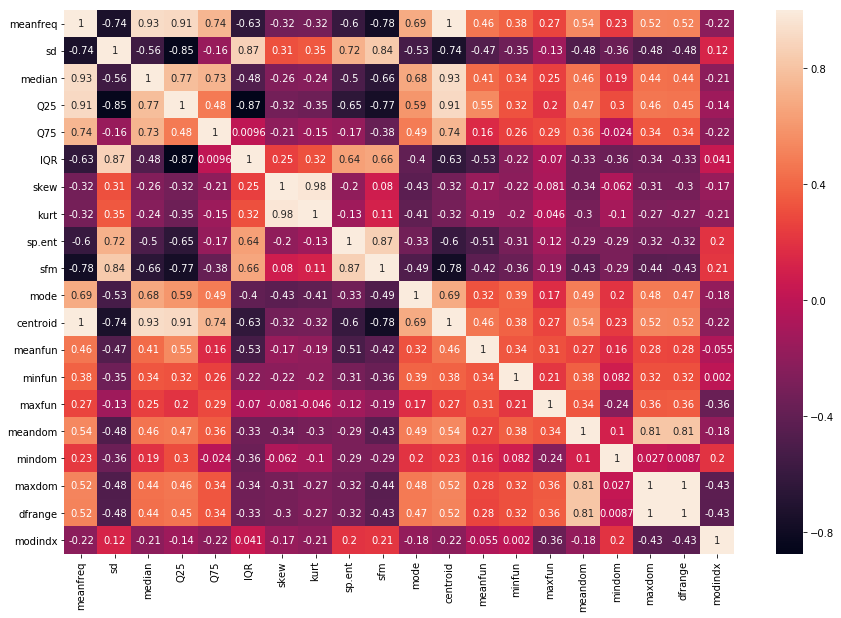

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [8]:
data[data['label']=='male'].shape[0]

1584

In [9]:
data[data['label']=='female'].shape[0]

1584

There are equal numbers of male and female in dataset

## Modelling 

Various modelling will be performed and determine which outperforms 

### 1. Preparation 

First is to change label into number labels (1:Male,0:Female)

In [10]:
data['label']=data['label'].apply(lambda x : '1' if x=='male' else '0')

In [11]:
data[data['label']=='1'].shape

(1584, 21)

Second is to separate feature set and label set

In [12]:
X=data[data.columns.difference(['label'])]
y=data['label']

Next standardize feature set

In [13]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Final is to separate training set and test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

### 2. Modelling

### 2.1 K Nearest Neighbor

In [15]:
neighbor = KNeighborsClassifier(n_neighbors=3)
neighbor.fit(X_train,y_train)
neighbor.score(X_test,y_test)

0.9810725552050473

98% of accurancy. Too good to be true
<br>Let's expand and see how many of neighbors can get highest score using training set and then use this parameter to predict test set

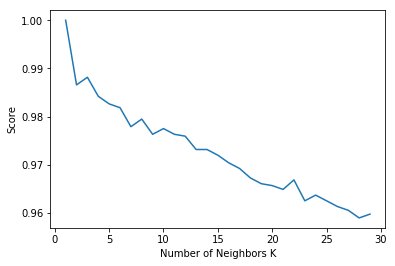

In [16]:
score_list=[]
range_list = range(1,30)
for i in range_list:
    neighbor = KNeighborsClassifier(n_neighbors=i)
    neighbor.fit(X_train,y_train)
    score_list.append(neighbor.score(X_train,y_train))

plt.plot(range_list,score_list)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Score')
plt.show()                      

Apparently the score drops as number of neighbors increases
<br> Final is to perform 1-NN and obtain score for test set 

In [17]:
neighbor = KNeighborsClassifier(n_neighbors=1)
neighbor.fit(X_train,y_train)
neighbor.score(X_test,y_test)

0.973186119873817

Not much improvement....

<br>

### 2.2 Support Vector Machine 

In [18]:
Svm=svm.SVC()

In [19]:
Svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
Svm.score(X_test,y_test)

0.9826498422712934

Better than K-NN as already reaching 99%
<br> Next is to use linear and poly kernel 

In [21]:
Svm_linear = svm.SVC(kernel='linear') 
Svm_linear.fit(X_train,y_train)
Svm_linear.score(X_test,y_test)

0.9763406940063092

In [22]:
Svm_poly = svm.SVC(kernel='poly',degree=3) 
Svm_poly.fit(X_train,y_train)
Svm_poly.score(X_test,y_test)

0.9700315457413249

Both svm using linear and poly kernel can also achieve over 97% of accuracy.

<br>

### 2.3 Logistic Regression

Apart from directly applying logistic regression, from the correlation graph before, we can know that some variables are highly correlated with others. Those variables can be removed first in order to reduce data size 

In [23]:
correlation = data.corr().abs()

In [24]:
upper = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool))

Using 0.9 as threshold to remove variables

In [25]:
correlated_list = [column for column in upper if any(upper[column]>0.9)]

In [26]:
correlated_list

['median', 'Q25', 'kurt', 'centroid', 'dfrange']

median is correlated to meanfreq
<br>Q25 is correlated to meanfreq
<br>kurt is correlated to skeq 
<br>centroid is correlated to Q25
<br>dfrange is correlated to maxdom 

Next is to remove from dataset

In [27]:
data_logreg= data
data_logreg.drop(correlated_list,axis=1,inplace=True)

Following is similar to previous preparation

In [28]:
X=data[data.columns.difference(['label'])]
y=data['label']
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)

0.9794952681388013

Still over 97% of accuracy. Too good to be true